# Explore the dataset

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:

class MinMaxScaler:
    def __init__(self, data, min_=0, max_=1) -> None:
        self.data_min = np.min(data)
        self.data_max = np.max(data)
        self.min_ = min_
        self.max_ = max_

    def transform(self, x):
        d_diff = self.data_max - self.data_min + 1e-32
        s_diff = self.max_ - self.min_
        return (x - self.data_min) / d_diff * s_diff + self.min_

    def inverse_transform(self, x):
        d_diff = self.data_max - self.data_min + 1e-32
        s_diff = self.max_ - self.min_
        return (x - self.min_) / s_diff * d_diff + self.data_min



class ChannelMinMaxScaler(MinMaxScaler):
    def __init__(self, data, axis_apply, min_=0, max_=1) -> None:
        super().__init__(data, min_, max_)
        self.data_min = np.nanmin(data, axis=axis_apply, keepdims=True)
        self.data_max = np.nanmax(data, axis=axis_apply, keepdims=True)
        

In [6]:
# plot utilies

def plot_field(field, vmin, vmax):
    '''field: shape [x, y]'''
    fig, axs = plt.subplots(4,4, figsize=(10,8))
    for i, ax in enumerate(axs.ravel()):
        im = ax.imshow(field[...,i].T, 
                cmap='rainbow',
                origin='lower',
                aspect='auto',
                vmin=vmin[i],
                vmax=vmax[i])
        ax.set_box_aspect(1)
        ax.axis('off')
        fig.colorbar(im)
    plt.tight_layout()
    plt.show()
    return fig



In [4]:
# Load the data set

data = h5py.File('/pscratch/sd/y/yixuans/datatset/SOMA/varyGM/thedataset4.hdf5', 'r')
print(data.keys())
print(len(data.keys()))

<KeysViewHDF5 ['forward_0', 'forward_1', 'forward_10', 'forward_11', 'forward_12', 'forward_13', 'forward_14', 'forward_15', 'forward_16', 'forward_17', 'forward_18', 'forward_19', 'forward_2', 'forward_20', 'forward_21', 'forward_22', 'forward_23', 'forward_24', 'forward_25', 'forward_26', 'forward_27', 'forward_28', 'forward_29', 'forward_3', 'forward_30', 'forward_31', 'forward_32', 'forward_33', 'forward_34', 'forward_35', 'forward_36', 'forward_37', 'forward_38', 'forward_39', 'forward_4', 'forward_40', 'forward_41', 'forward_42', 'forward_43', 'forward_44', 'forward_45', 'forward_46', 'forward_47', 'forward_48', 'forward_49', 'forward_5', 'forward_50', 'forward_51', 'forward_52', 'forward_53', 'forward_54', 'forward_55', 'forward_56', 'forward_57', 'forward_58', 'forward_59', 'forward_6', 'forward_60', 'forward_61', 'forward_62', 'forward_63', 'forward_64', 'forward_65', 'forward_66', 'forward_67', 'forward_68', 'forward_69', 'forward_7', 'forward_70', 'forward_71', 'forward_72',

plotting forward_0...
(30, 60, 100, 100, 17)


0


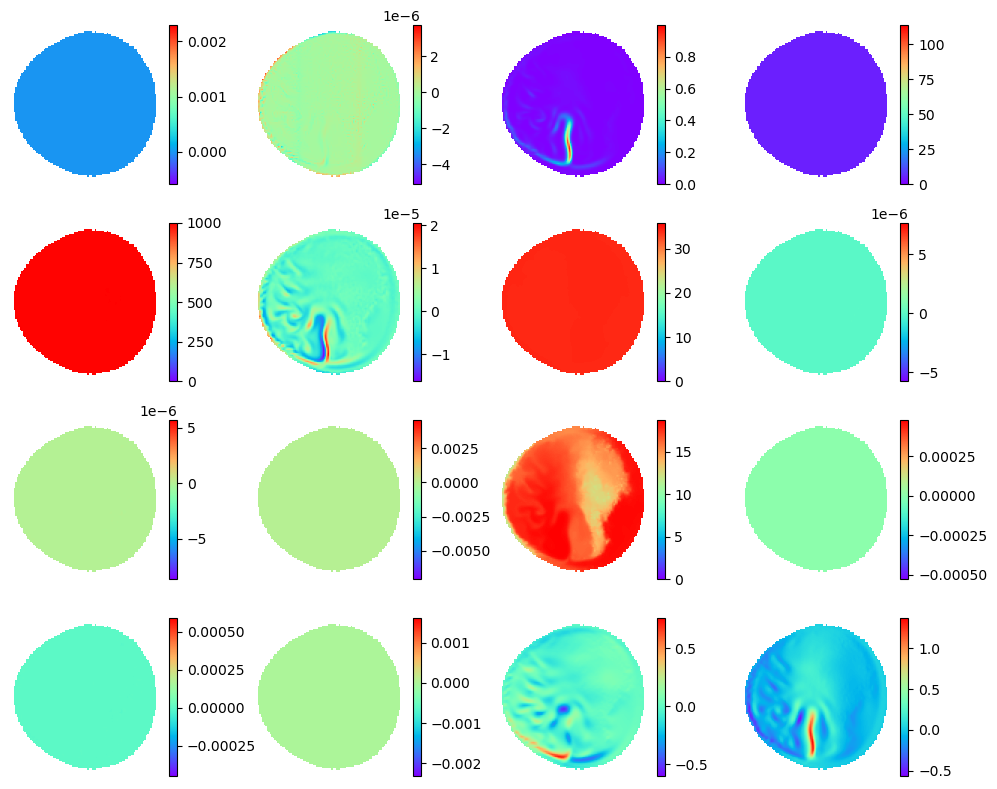

5


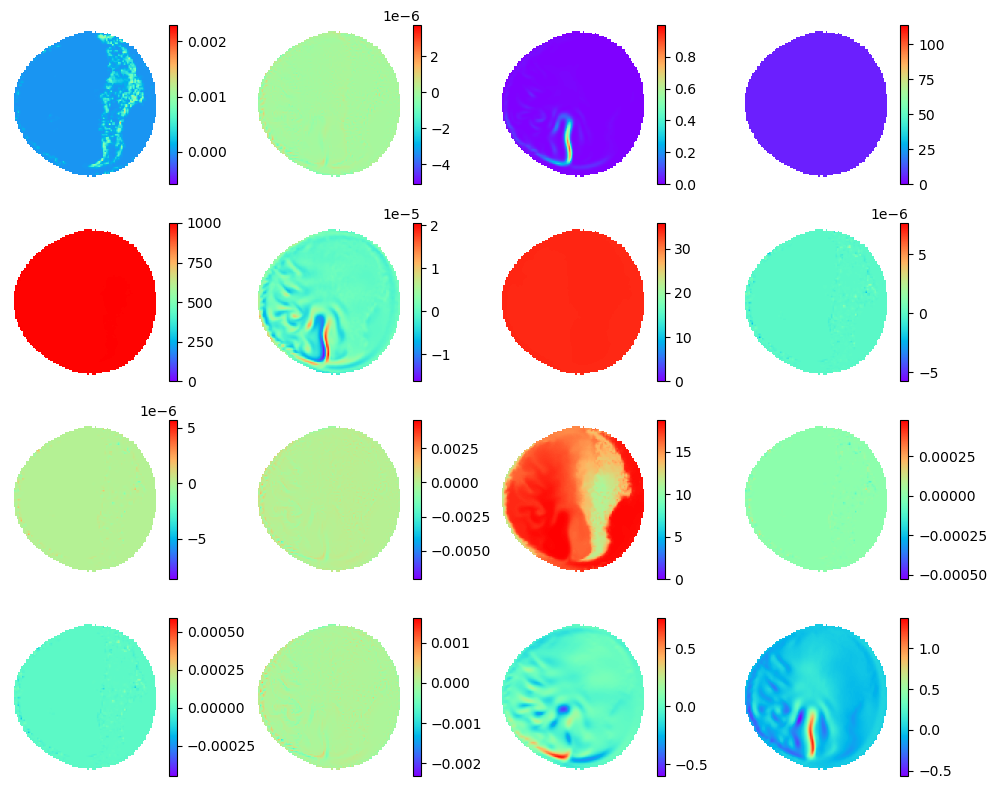

10


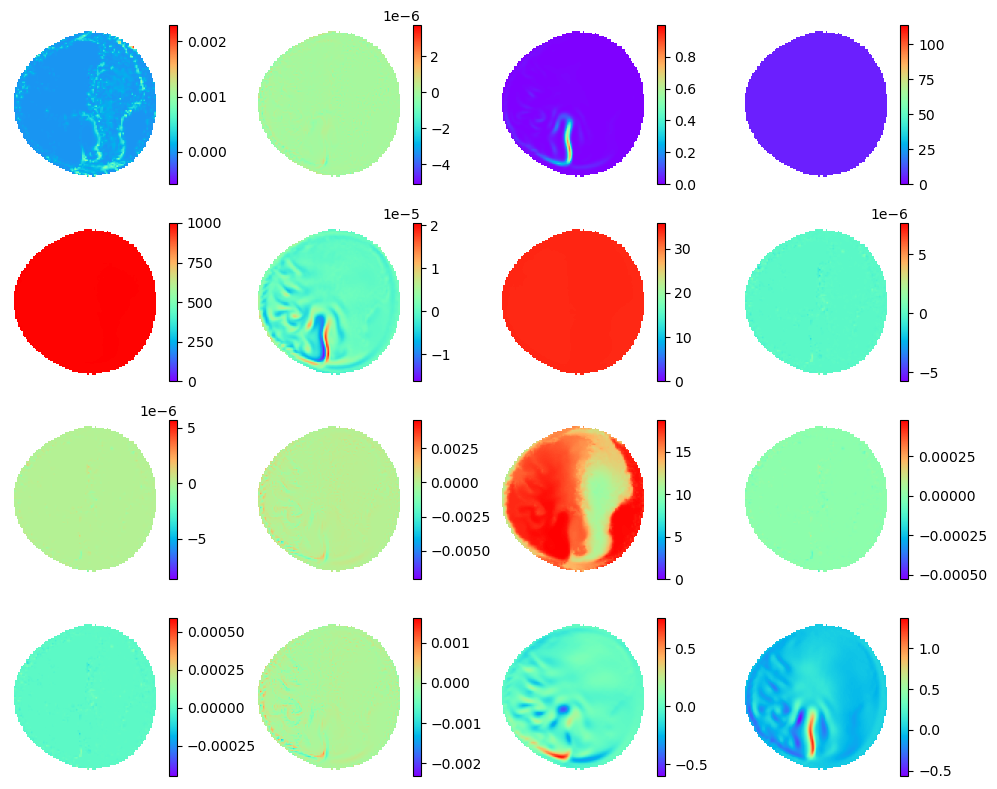

15


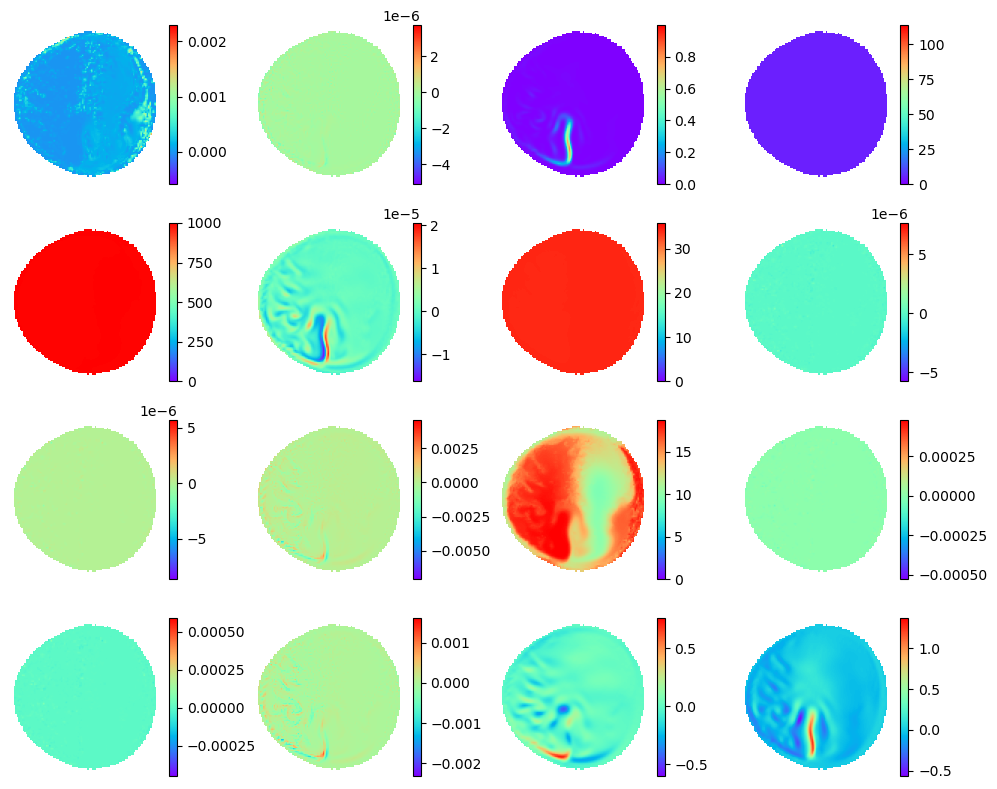

20


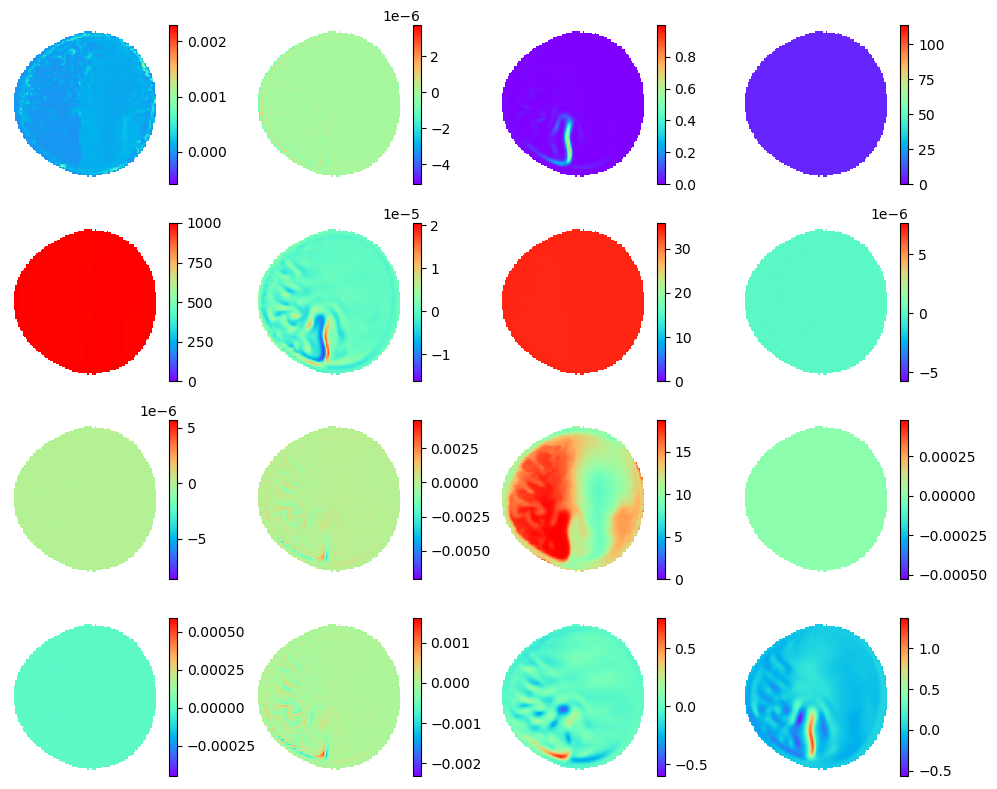

25


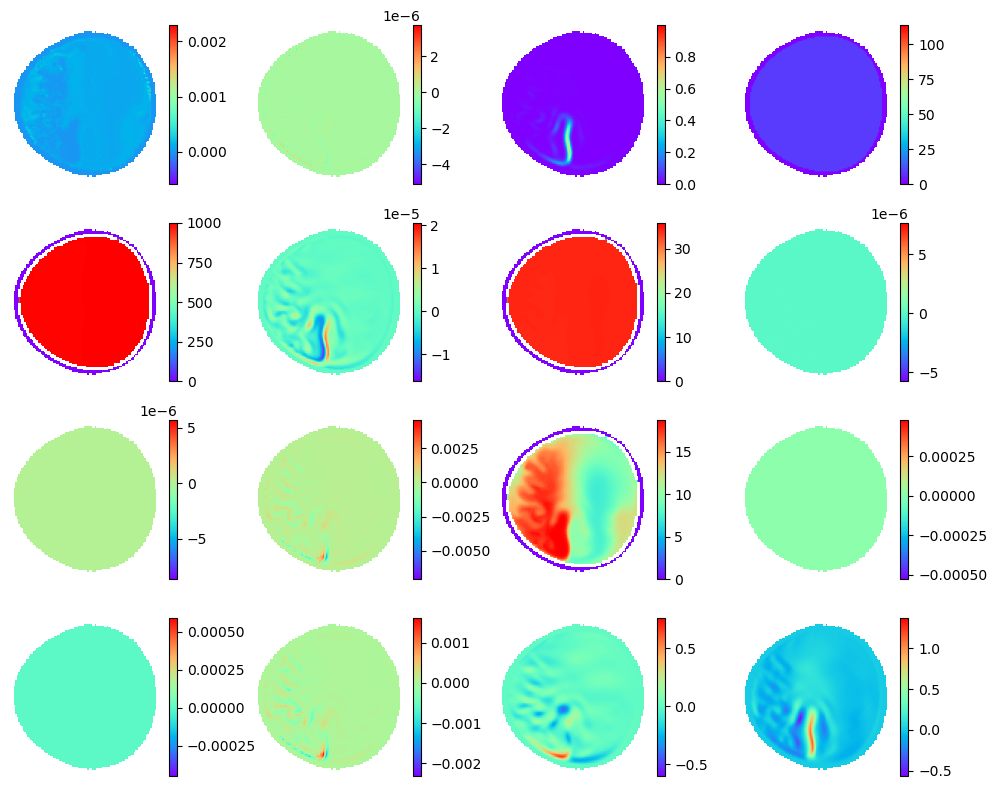

30


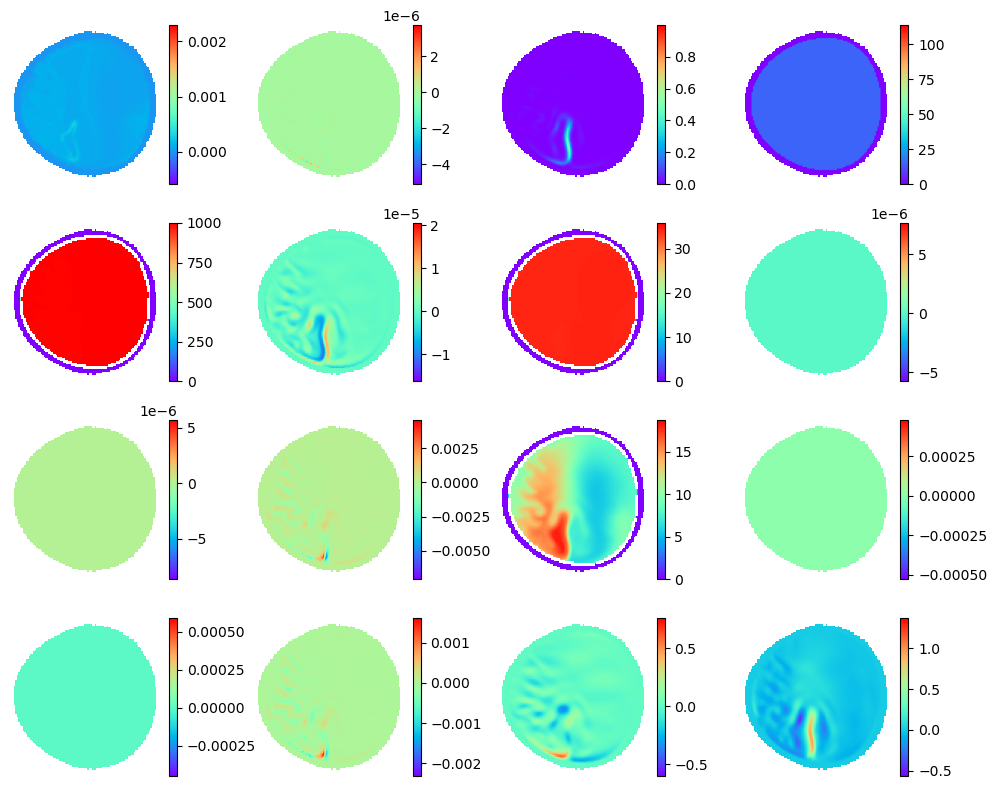

35


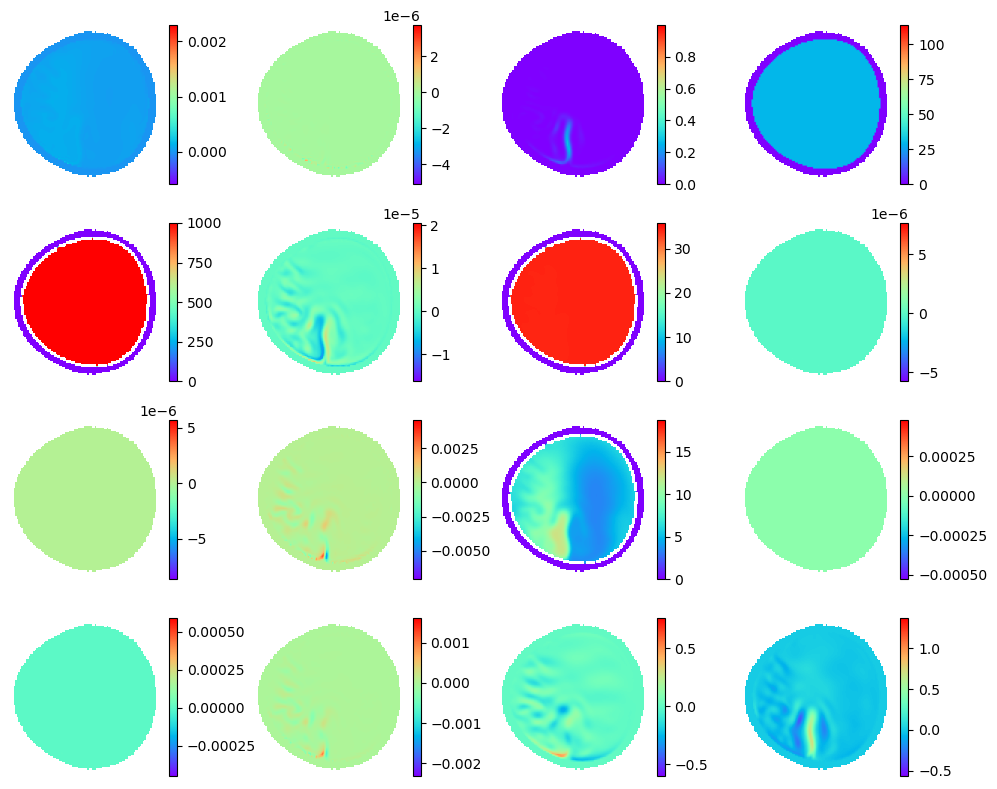

40


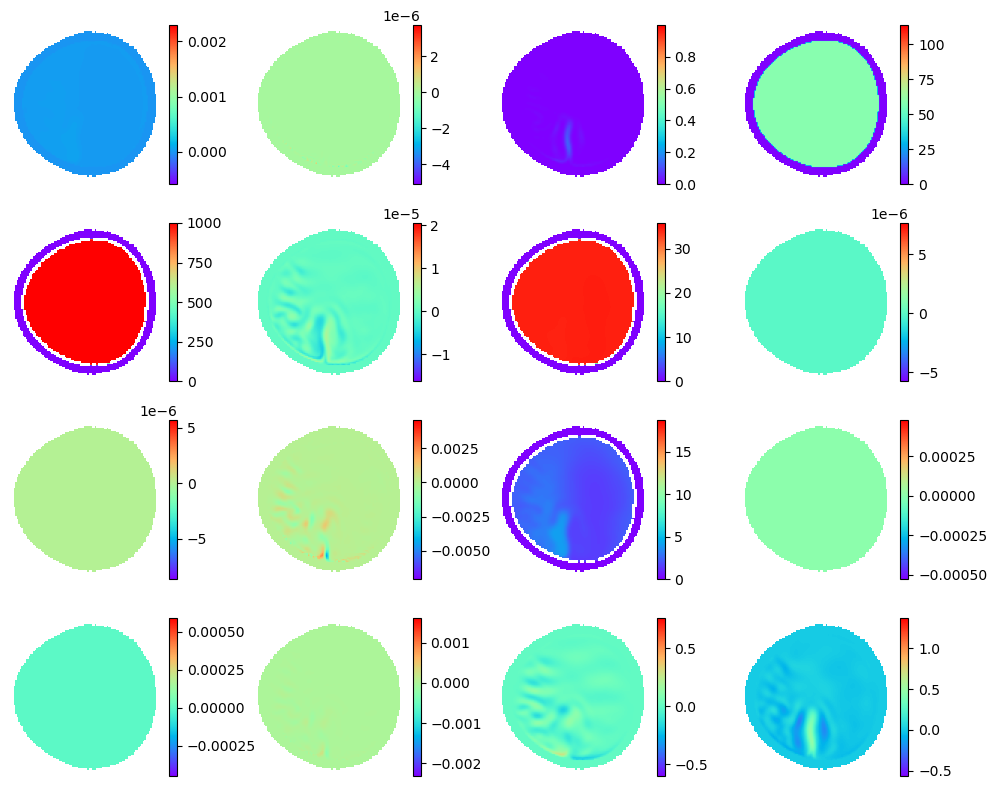

45


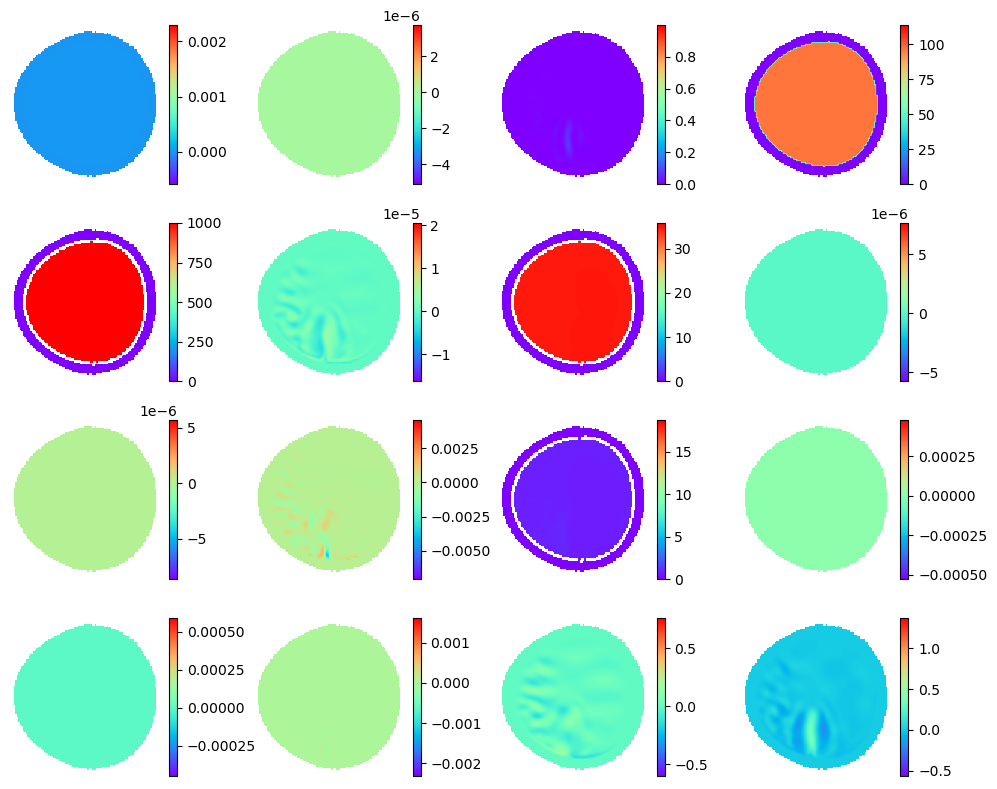

50


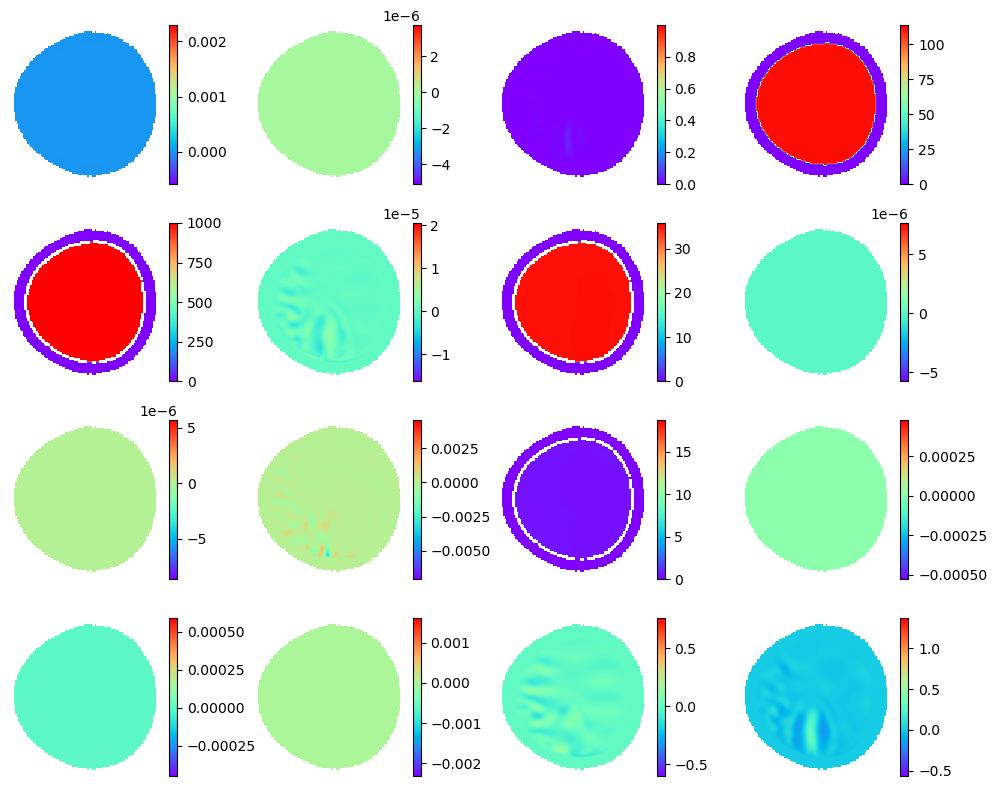

55


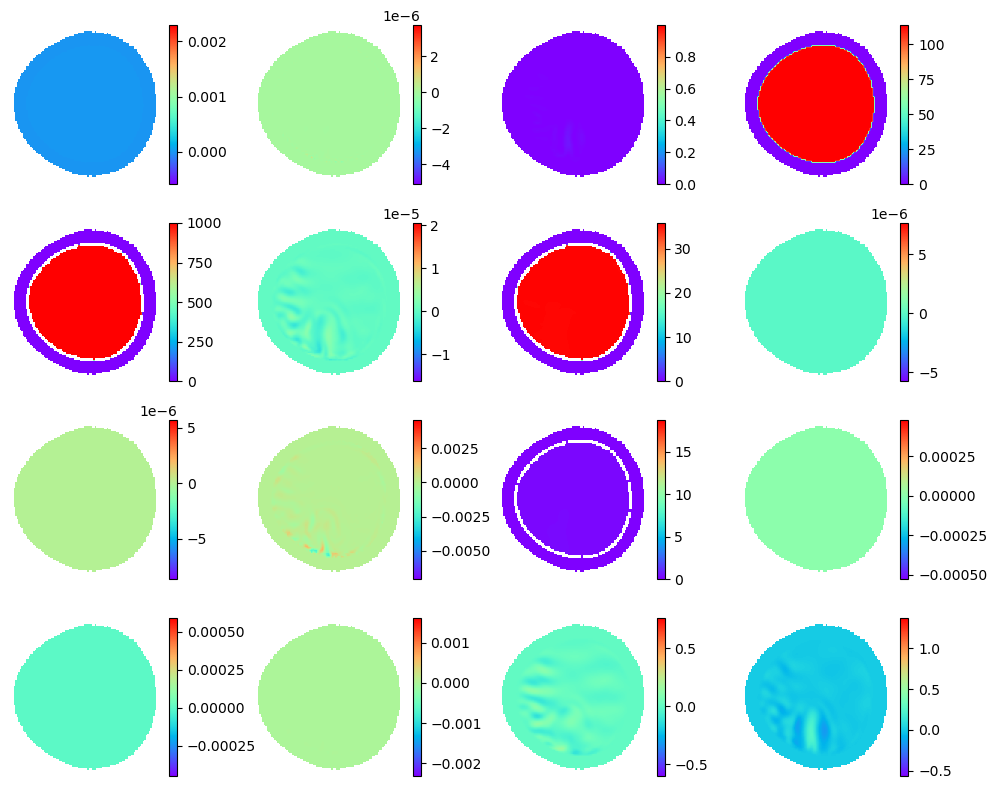

In [7]:
# just to visually inspect the dataset
# create a folder for each forward run
# and plot out all 16 variables at each time step
# plot out the middle vertical layer

import os
path = '/pscratch/sd/y/yixuans/'
for k in data.keys():
    print(f'plotting {k}...')
    forward = data['forward_16'][...]

    print(forward.shape)

    mask1 = forward < -1e16
    mask2 = forward > 1e16
    mask = np.logical_or(mask1, mask2)

   
    forward[mask] = np.nan
    vmin = np.nanmin(forward, axis=(0,1,2,3))
    vmax = np.nanmax(forward, axis=(0,1,2,3))

    for i in range(forward.shape[0]):
        # scaler = ChannelMinMaxScaler(forward_0, (0, 1, 2, 3))
        # forward_0 = scaler.transform(forward_0)


        # import pickle

        # with open('../tmp/SOMA_mask.pkl', 'wb') as f:
        #     mask = {'mask1': mask1, 'mask2': mask2}
        #     pickle.dump(mask, f)
        for j in range(0, 60, 5):
            print(j)
            fig = plot_field(forward[28, j, :, :,: ], vmin=vmin, vmax=vmax)
            if not os.path.exists(path + f'{k}/'):
                os.makedirs(path + f'{k}/')
            fig.savefig(path + f'{k}/{i}.pdf', format='pdf')
            plt.show()
            plt.close()
        break
    break

    # get the min max for all variables from the first example
    # for i in range(forward_0.shape[-1]):
    #     print((np.nanmin(forward_0[..., i]), np.nanmax(forward_0[..., i])))


    # investigate where 0 is coming from in GM
    # mask_0 = forward_0[...,-1] == 0
    # a = forward_0
    # a[mask_0] = 500
    # for i in range(forward_0.shape[0]):
    #     plt.imshow(a[i,0, ..., -1], cmap='seismic')
    #     plt.show()



In [6]:
# load prediction data
import pickle
import numpy as np 

with open('/pscratch/sd/y/yixuans/2023-07-26-true_pred.pkl', 'rb') as f:
    data = pickle.load(f)

with open('../tmp/SOMA_mask.pkl', 'rb') as f:
    mask = pickle.load(f)

mask = np.logical_or(mask['mask1'], mask['mask2'])
true = data['true'][0]
pred = data['pred'][0]

print(pred.shape)


true = np.transpose(true, axes=(0, 2, 3, 4, 1))
pred = np.transpose(pred, axes=(0, 2, 3, 4, 1))
print(pred.shape)

print(true.shape)
print(mask.shape)
mask_b = mask[0:1,0:1,:,:,0:1]
mask_b = np.broadcast_to(mask_b, true.shape)
print(mask_b.shape)
true[mask_b] = np.nan
pred[mask_b] = np.nan
print(true.shape, pred.shape)


(29, 16, 60, 100, 100)
(29, 60, 100, 100, 16)
(29, 60, 100, 100, 16)
(30, 60, 100, 100, 17)
(29, 60, 100, 100, 16)
(29, 60, 100, 100, 16) (29, 60, 100, 100, 16)


NameError: name 'plot_field' is not defined

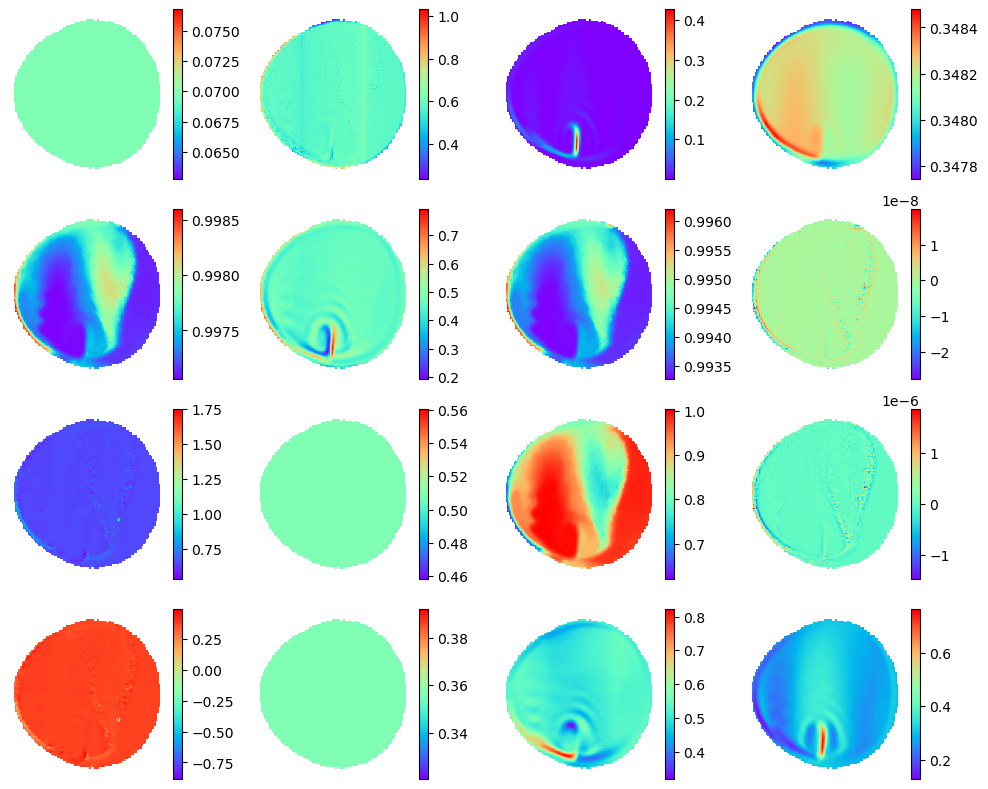

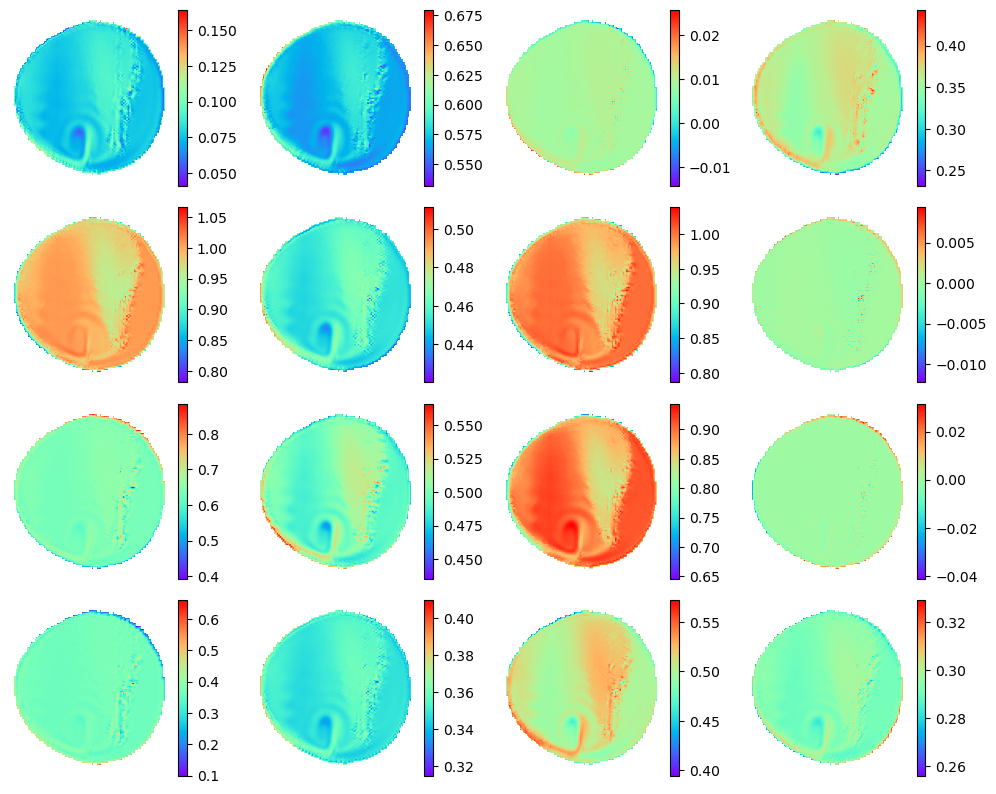

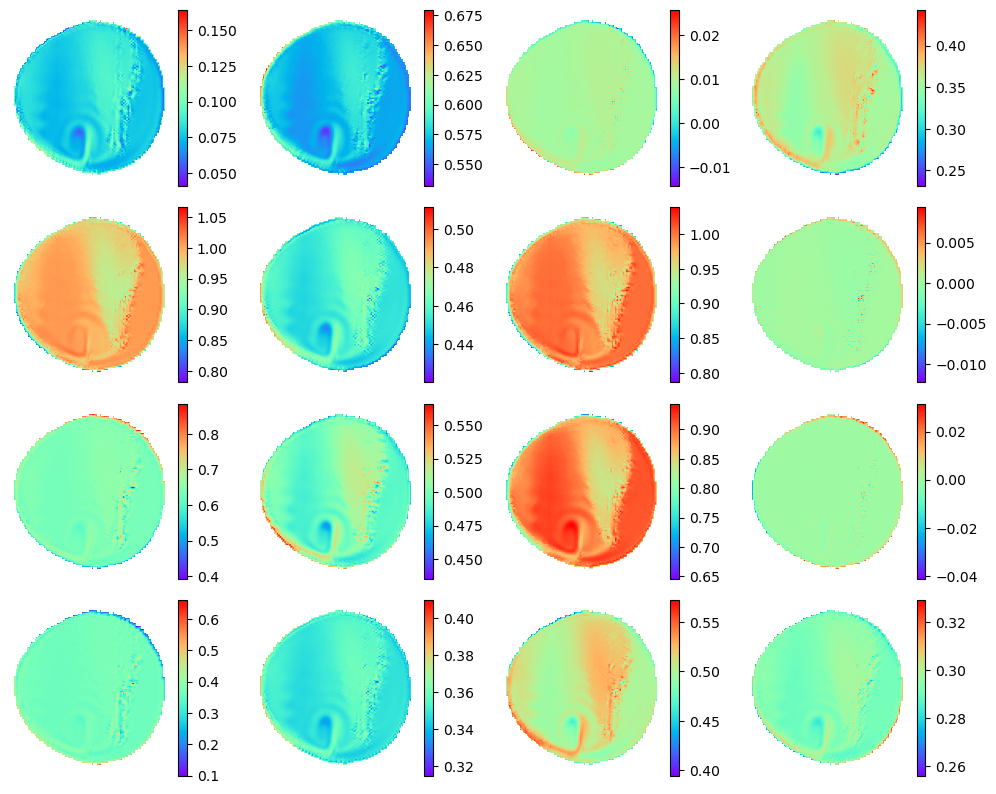

In [14]:
plot_field(true[0,0,...])
plot_field(pred[0,0, ...])

In [18]:
# report metric scores
from sklearn.metrics import r2_score

print(r2_score(np.nan_to_num(true.flatten()), np.nan_to_num(pred.flatten())))

: 

: 